pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
Total # roots (14): 458514.0
Total # roots (15): 981369.0
Total # roots (16): 2096180.0
Total # roots (17): 4453500.0
Total # unique roots: 137648
Max pixel count: 48828.0
Min pixel count: -1336.0


<IPython.core.display.Javascript object>


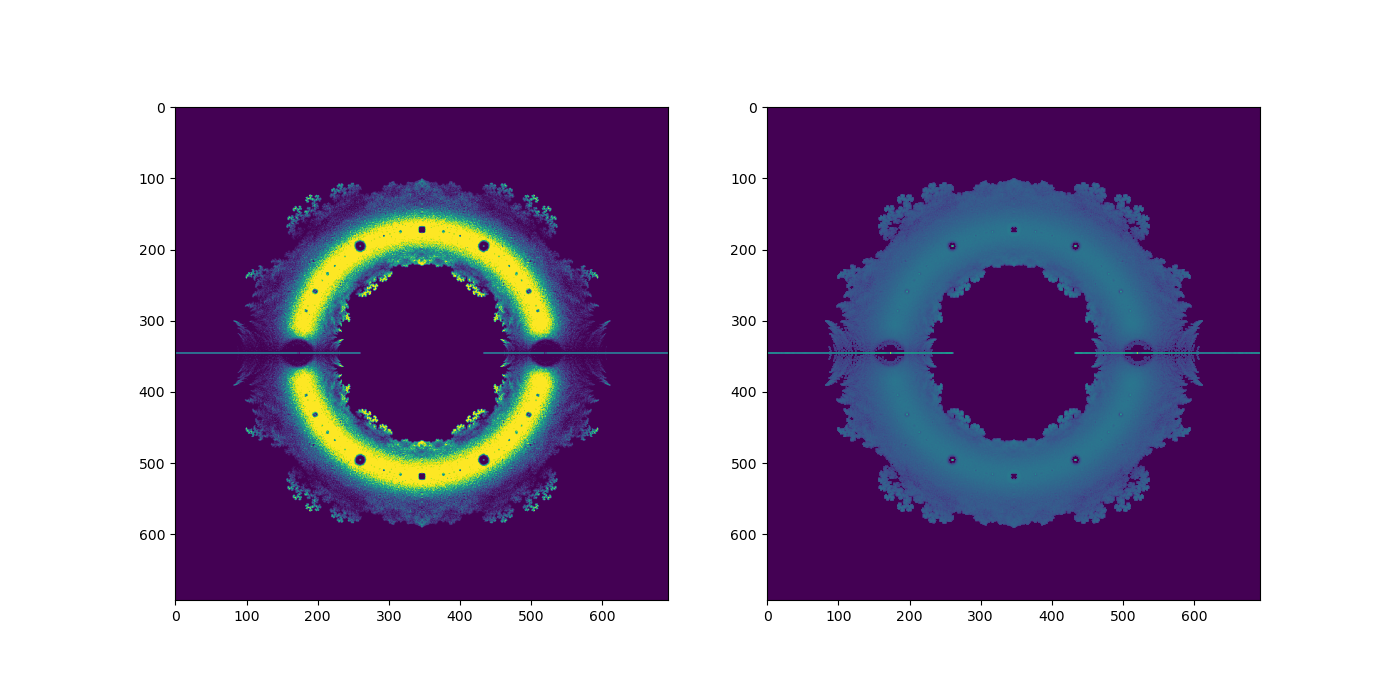

Total runtime: 1.2891142999999978


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import pygame
import sys
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.animation import FuncAnimation
import matplotlib
import random
import csv
import skimage.filters
from PIL import Image
from ipywidgets import interact, fixed, widgets
import seaborn as sns
import matplotlib.colors as colors

start = time.perf_counter()

def getData3(file,size):
    newData = np.empty((size,size))
    rowNum = 0
    side = int(np.sqrt(size))
    with open(file, newline='') as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            newData[rowNum] = row
            rowNum += 1
    return newData

def combineData2x2(data,sideLen):
    newData = np.empty((sideLen//2,sideLen//2))
    for x in range(0,sideLen//2):
        for y in range(0,sideLen//2):
            newBin = data[2*x][2*y] + data[(2*x) +1][2*y] + data[2*x][(2*y) +1] + data[(2*x) +1][(2*y) +1]
            newData[x][y] = newBin
    return newData

def combineData3x3(data,sideLen):
    newData = np.empty((sideLen//3,sideLen//3))
    for x in range(0,sideLen//3):
        for y in range(0,sideLen//3):
            newBin = data[3*x][3*y] + data[3*x][(3*y) +1] + data[3*x][(3*y) +2] \
                    +data[(3*x) +1][3*y] + data[(3*x) +1][(3*y) +1] + data[(3*x) +1][(3*y) +2]\
                    +data[(3*x) +2][3*y] + data[(3*x) +2][(3*y) +1] + data[(3*x) +2][(3*y) +2]
            newData[x][y] = newBin
    return newData

def combineData(data,sideLen,fact):
    newSide = sideLen //fact
    newSide2 = sideLen //newSide
    return data[0:sideLen,0:sideLen].reshape(newSide,newSide2,newSide,newSide2).mean(-1).mean(1)
    
def cropImg(data,sideLen,x1,x2,y1,y2,xyLim):
    startX = int(((x1 * sideLen) / (xyLim * 2)) + (sideLen / 2))
    endX = int(((x2 * sideLen) / (xyLim * 2)) + (sideLen / 2))
    startY = int(((y1 * sideLen) / (xyLim * 2)) + (sideLen / 2))
    endY = int(((y2 * sideLen) / (xyLim * 2)) + (sideLen / 2))
    return data[startY:endY,startX:endX]

data4 = np.swapaxes(getData3("../output/693_64_polyDeg4.csv", (693)),0,1)
data5 = np.swapaxes(getData3("../output/693_64_polyDeg5.csv", (693)),0,1)
data6 = np.swapaxes(getData3("../output/693_128_polyDeg6.csv", (693)),0,1)
data7 = np.swapaxes(getData3("../output/693_256_polyDeg7.csv", (693)),0,1)
data8 = np.swapaxes(getData3("../output/693_512_polyDeg8.csv", (693)),0,1)
data9 = np.swapaxes(getData3("../output/693_1024_polyDeg9.csv", (693)),0,1)
data10 = np.swapaxes(getData3("../output/693_2048_polyDeg10.csv", (693)),0,1)
data11 = np.swapaxes(getData3("../output/693_4096_polyDeg11.csv", (693)),0,1)
data12 = np.swapaxes(getData3("../output/693_8192_polyDeg12_pc.csv", (693)),0,1)
data13 = np.swapaxes(getData3("../output/693_16384_polyDeg13_pc.csv", (693)),0,1)
data14 = np.swapaxes(getData3("../output/693_32768_polyDeg14_hpc.csv", (693)),0,1)
data15 = np.swapaxes(getData3("../output/693_32760_polyDeg15.csv", (693)),0,1)
data16 = np.swapaxes(getData3("../output/693_32760_polyDeg16.csv", (693)),0,1)
data17 = np.swapaxes(getData3("../output/693_32760_polyDeg17.csv", (693)),0,1)
data18 = np.swapaxes(getData3("../output/693_32768_polyDeg18_hpc_1.csv", (693)),0,1) + np.swapaxes(getData3("../output/693_32768_polyDeg18_hpc_2.csv", (693)),0,1)
dataLst = [data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16,data17,data18]
dataDiff = [(data5-data4),(data6-data5),(data7-data6),(data8-data7),(data9-data8),(data10-data9),(data11-data10),(data12-data11),
            (data13-data12),(data14-data13),(data15-data14),(data16-data15),(data17-data16),(data18-data17)]

print("Total # roots (14):", np.sum(data14))
print("Total # roots (15):", np.sum(data15))
print("Total # roots (16):", np.sum(data16))
print("Total # roots (17):", np.sum(data17))
print("Total # unique roots:", np.count_nonzero(dataDiff[12]))
print("Max pixel count:", np.amax(dataDiff[12]))  
print("Min pixel count:", np.amin(dataDiff[12]))  

fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# img = plt.imshow(np.where(dataLst[14]>500,500,dataLst[14]),cmap='hot',interpolation=None)
ax1.imshow(np.clip(dataLst[13],-50,50),interpolation=None)
ax2.imshow(dataLst[13], norm=colors.PowerNorm(gamma=0.15),interpolation=None)
# ax2.imshow(np.clip(dataDiff[12],-50,50),cmap='twilight',interpolation=None)

# def update(i):
#     ind=int(i/100)
#     weight = (i%100) / 100.0
#     datas = (dataLst[ind] + (dataDiff[ind] *weight))
#     img.set_array(datas)
#     return img,

# anim = FuncAnimation(fig,update,frames=1390,interval=10,repeat=True,blit=False)
plt.show()

end = time.perf_counter()

print("Total runtime:", (end-start))

,row,col
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
6745,10,0.0
6746,11,0.0
6747,12,0.0
6748,13,0.0


<IPython.core.display.Javascript object>


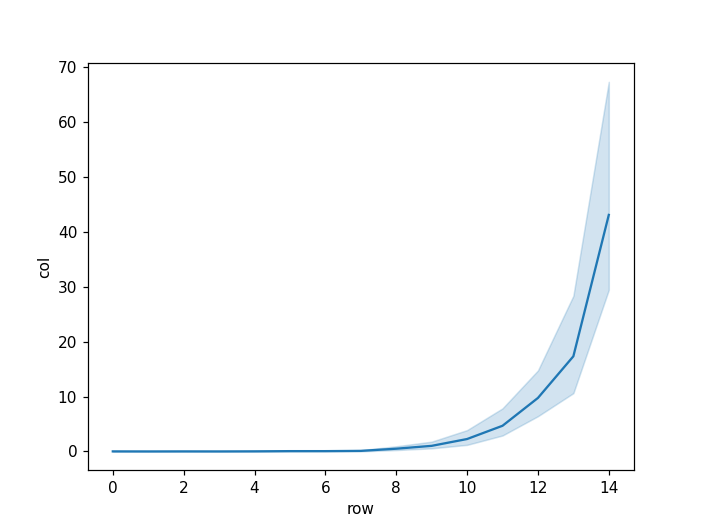

Total runtime: 0.35439299999961804


In [66]:
import seaborn as sns
import pandas as pd
import time

start = time.perf_counter()

d = {"row": [],"col": []}
# arr = np.array(dataLst)[:,200:201,200:201].flatten()
# display(arr)
for i in range(450):
#     d[str(i)] = np.array(dataLst)[:,(i+198):(i+199),256:257].flatten()
    for j in range(15):
        d["row"].append(j)
        d["col"].append(dataLst[j][i+198][256])
#     d['200'].append(dataLst[i][198][256])
#     d['201'].append(dataLst[i][199][256])
#     d['202'].append(dataLst[i][200][256])
#     d['203'].append(dataLst[i][201][256])
df = pd.DataFrame(data=d)
# dfWide = df.pivot()
# print(type(df))
display(df)
sns.lineplot(data=df,x="row",y="col",legend=False)

end = time.perf_counter()
print("Total runtime:", (end-start))

<IPython.core.display.Javascript object>


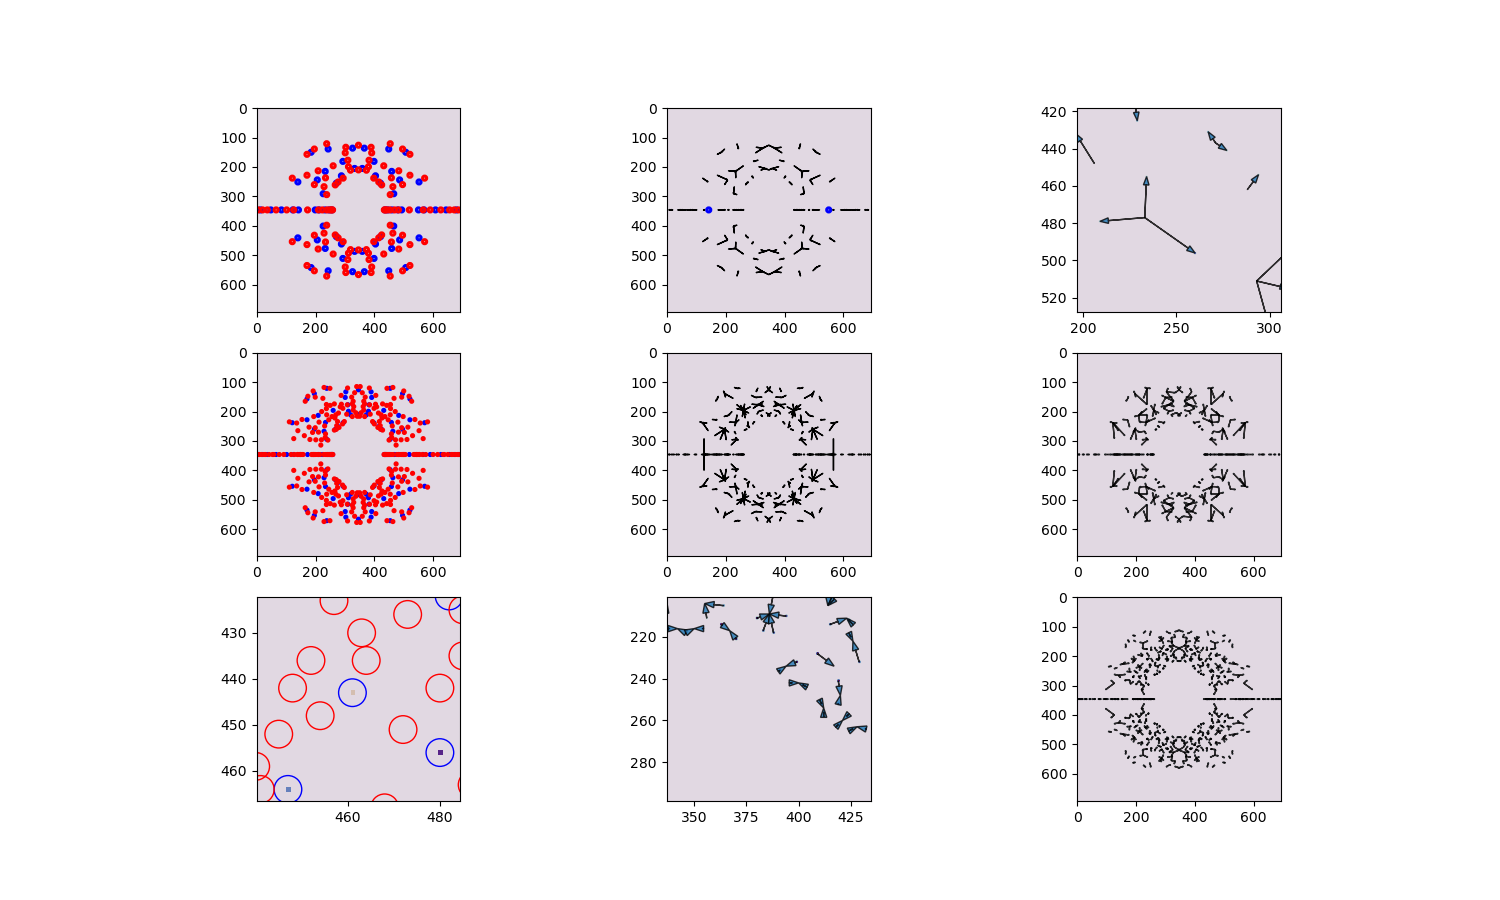

Deg4 roots: 64
Deg5 roots: 106
Deg6 roots: 322
Deg7 roots: 694
Missed roots (4): 2
Missed roots (5): 0
Missed roots (6): 18
len(arrX): 114  --  len(arrY): 114  --  len(arrDx): 114  --  len(arrDy): 114
len(arrX2): 322  --  len(arrY2): 322  --  len(arrDx2): 322  --  len(arrDy2): 322
len(arrX3): 720  --  len(arrY3): 720  --  len(arrDx3): 720  --  len(arrDy3): 720
Total Runtime: 4.3675874000000015


In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.perf_counter()

def nearestRoots(arr1,arr2):
    arr3 = np.nonzero(arr1)
    arr4 = np.nonzero(arr2)
    xs = []
    ys = []
    dxs = []
    dys = []
    for i in range(len(arr3[0])):
        dist = 1000
        tempDist = 1000
        tempX = []
        tempY = []
        tempDx = []
        tempDy = []
        for j in range(len(arr4[0])):
            tempDist = np.sqrt(pow((arr4[0][j]-arr3[0][i]),2) + (pow((arr4[1][j]-arr3[1][i]),2)))
            if tempDist < dist:
                tempX = arr3[0][i]
                tempY = arr3[1][i]
                tempDx = arr4[0][j]-arr3[0][i]
                tempDy = arr4[1][j]-arr3[1][i]
                dist = tempDist
            elif tempDist == dist:
                tempX = np.append(tempX, arr3[0][i])
                tempY = np.append(tempY, arr3[1][i])
                tempDx = np.append(tempDx, (arr4[0][j]-arr3[0][i]))
                tempDy = np.append(tempDy, (arr4[1][j]-arr3[1][i]))
        
        xs = np.append(xs,tempX)
        ys = np.append(ys,tempY)
        dxs = np.append(dxs,tempDx)
        dys = np.append(dys,tempDy)
    
    return xs, ys, dxs, dys

def reverseNearRoots(arr1,arr2):
    ### arr1 is the input matrix which represents the polynomial with GREATER degree.
    ## Each value in the 2x2 array is the number of roots which land on that pixel.
    ### arr2 is the input matrix which represents the polynomial with FEWER degree.
    ## Each value in the 2x2 array is the number of roots which land on that pixel.
    ## arr3 is an array of all nonzero values of arr1
    ## arr4 is an array of all nonzero values of arr2

    arr3 = np.nonzero(arr1)
    arr4 = np.nonzero(arr2)
    rankArr = np.zeros((np.count_nonzero(arr2),np.count_nonzero(arr1)))
    xStart = []
    yStart = []
    xEnd = []
    yEnd = []

    for i,(x1,y1) in enumerate(zip(arr4[0],arr4[1])):
        for j,(x2,y2) in enumerate(zip(arr3[0],arr3[1])):
            rankArr[i][j] = np.sqrt(pow((x2-x1),2) + (pow((y2-y1),2)))
    
    sortInds = np.argsort(rankArr,axis=1)
    ind = 0
    foundSet = set()
    tempSet = set()
    for m in range(np.count_nonzero(arr1)):
        for n in range(np.count_nonzero(arr2)):
            ind = sortInds[n][m]
            if ind not in foundSet:
                tempSet.add(ind)
                xStart.append(arr4[0][n])
                yStart.append(arr4[1][n])
                xEnd.append(arr3[0][ind])
                yEnd.append(arr3[1][ind])
        foundSet.update(tempSet)
    
    return np.array(xStart), np.array(yStart), np.array(xEnd), np.array(yEnd), (np.array(xEnd)-np.array(xStart)), (np.array(yEnd)-np.array(yStart))

def arrowHeads(arr1,arr2):
    arr3 = np.nonzero(arr1)
    arr4 = np.nonzero(arr2)
    retArr = np.zeros_like(arr1)

    for i in range(len(arr3[0])):
        dist = 1000
        tempDist = 1000
        tempX = []
        tempY = []
        for j in range(len(arr4[0])):
            tempDist = np.sqrt(pow((arr4[0][j]-arr3[0][i]),2) + (pow((arr4[1][j]-arr3[1][i]),2)))
            if tempDist < dist:
                tempX = arr4[0][j]
                tempY = arr4[1][j]
                dist = tempDist
            elif tempDist == dist:
                tempX = np.append(tempX, arr4[0][j])
                tempY = np.append(tempY, arr4[1][j])
        if type(tempX) == np.ndarray:
            retArr[tempX[0]][tempY[0]] = 1
            retArr[tempX[1]][tempY[1]] = 1
        else:
            retArr[tempX][tempY] = 1
    
    return retArr
        
dat4 = data4 +np.fliplr(data4)
dat5 = data5 +np.fliplr(data5)
dat6 = data6 +np.fliplr(data6)
dat7 = data7 +np.fliplr(data7)
# Creating data set
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

arrX, arrY, arrDx, arrDy = nearestRoots(dat5,dat4)
arrX2, arrY2, arrDx2, arrDy2 = nearestRoots(dat6,dat5)
arrX3, arrY3, arrDx3, arrDy3 = nearestRoots(dat7,dat6)
heads = arrowHeads(dat5,dat4)
heads2 = arrowHeads(dat6,dat5)
heads3 = arrowHeads(dat7,dat6)

arrX4, arrY4, endX4, endY4, diffX4, diffY4 = reverseNearRoots(dat5,dat4)
arrX5, arrY5, endX5, endY5, diffX5, diffY5 = reverseNearRoots(dat6,dat5)
arrX6, arrY6, endX6, endY6, diffX6, diffY6 = reverseNearRoots(dat7,dat6)
 
# Creating plot
fig = plt.figure(figsize = (15,9))
ax0 = fig.add_subplot(331)
ax1 = fig.add_subplot(332)
ax2 = fig.add_subplot(334)
ax3 = fig.add_subplot(335)
ax4 = fig.add_subplot(337)
ax5 = fig.add_subplot(338)

ax00 = fig.add_subplot(333)
ax01 = fig.add_subplot(336)
ax02 = fig.add_subplot(339)

count = 0
rootIndices = np.argwhere(np.swapaxes(dat4,0,1) >0)
for inds in rootIndices:
    count += 1
    ax0.add_patch(plt.Circle(inds, radius=5, edgecolor='b',lw=3, fill=False))
print("Deg4 roots:", count)
count1 = 0
rootIndices1 = np.argwhere(np.swapaxes(dat5,0,1) >0)
for inds1 in rootIndices1:
    count1 += 1
    ax0.add_patch(plt.Circle(inds1, radius=5, edgecolor='r',lw=3, fill=False))
    ax2.add_patch(plt.Circle(inds1, radius=4, edgecolor='b',lw=2, fill=False))
print("Deg5 roots:", count1)
count2 = 0
rootIndices2 = np.argwhere(np.swapaxes(dat6,0,1) >0)
for inds2 in rootIndices2:
    count2 += 1
    ax2.add_patch(plt.Circle(inds2, radius=4, edgecolor='r',lw=2, fill=False))
    ax4.add_patch(plt.Circle(inds2, radius=3, edgecolor='b',lw=1, fill=False))
print("Deg6 roots:", count2)
count3 = 0
rootIndices3 = np.argwhere(np.swapaxes(dat7,0,1) >0)
for inds3 in rootIndices3:
    count3 += 1
    ax4.add_patch(plt.Circle(inds3, radius=3, edgecolor='r',lw=1, fill=False))
print("Deg7 roots:", count3)
count4 = 0
rootIndices4 = np.argwhere(np.swapaxes(np.where(dat4>0,1,0)-np.where(heads>0,1,0),0,1)!=0)
for inds4 in rootIndices4:
    count4 += 1
    ax1.add_patch(plt.Circle(inds4, radius=5, edgecolor='b',lw=3, fill=False))
print("Missed roots (4):", count4)
count5 = 0
rootIndices5 = np.argwhere(np.swapaxes(np.where(dat5>0,1,0)-np.where(heads2>0,1,0),0,1)!=0)
for inds5 in rootIndices5:
    count5 += 1
    ax3.add_patch(plt.Circle(inds5, radius=5, edgecolor='b',lw=3, fill=False))
print("Missed roots (5):", count5)
count6 = 0
rootIndices6 = np.argwhere(np.swapaxes(np.where(dat6>0,1,0)-np.where(heads3>0,1,0),0,1)!=0)
for inds6 in rootIndices6:
    count6 += 1
    ax5.add_patch(plt.Circle(inds6, radius=5, edgecolor='b',lw=3, fill=False))
print("Missed roots (6):", count6)

print("len(arrX):", len(arrX), " --  len(arrY):", len(arrY), " --  len(arrDx):", len(arrDx), " --  len(arrDy):", len(arrDy))
for in0 in range(len(arrX)):
    ax1.arrow(arrY[in0],arrX[in0],arrDy[in0],arrDx[in0], length_includes_head=True, head_width=3)
print("len(arrX2):", len(arrX2), " --  len(arrY2):", len(arrY2), " --  len(arrDx2):", len(arrDx2), " --  len(arrDy2):", len(arrDy2))
for in1 in range(len(arrX2)):
    ax3.arrow(arrY2[in1],arrX2[in1],arrDy2[in1],arrDx2[in1], length_includes_head=True, head_width=3)
print("len(arrX3):", len(arrX3), " --  len(arrY3):", len(arrY3), " --  len(arrDx3):", len(arrDx3), " --  len(arrDy3):", len(arrDy3))
for in2 in range(len(arrX3)):
    ax5.arrow(arrY3[in2],arrX3[in2],arrDy3[in2],arrDx3[in2], length_includes_head=True, head_width=3, alpha=0.8)

for in4 in range(len(arrX4)):
    ax00.arrow(arrY4[in4],arrX4[in4],diffY4[in4],diffX4[in4], length_includes_head=True, head_width=3, alpha=0.8)
for in5 in range(len(arrX5)):
    ax01.arrow(arrY5[in5],arrX5[in5],diffY5[in5],diffX5[in5], length_includes_head=True, head_width=3, alpha=0.8)
for in6 in range(len(arrX6)):
    ax02.arrow(arrY6[in6],arrX6[in6],diffY6[in6],diffX6[in6], length_includes_head=True, head_width=3, alpha=0.8)

# ax0.streamplot(X, Y, U, V, density = 1)
ax0.imshow(dat4,cmap='twilight',interpolation=None)
ax1.imshow(dat5,cmap='twilight',interpolation=None)
ax2.imshow(dat5,cmap='twilight',interpolation=None)
ax3.imshow(dat6,cmap='twilight',interpolation=None)
ax4.imshow(dat6,cmap='twilight',interpolation=None)
ax5.imshow(np.clip(dat7,0,10),cmap='twilight',interpolation=None)
ax00.imshow(dat5,cmap='twilight',interpolation=None)
ax01.imshow(dat6,cmap='twilight',interpolation=None)
ax02.imshow(np.clip(dat7,0,10),cmap='twilight',interpolation=None)
# show plot
plt.show()

end = time.perf_counter()
print("Total Runtime:", (end-start))

<IPython.core.display.Javascript object>


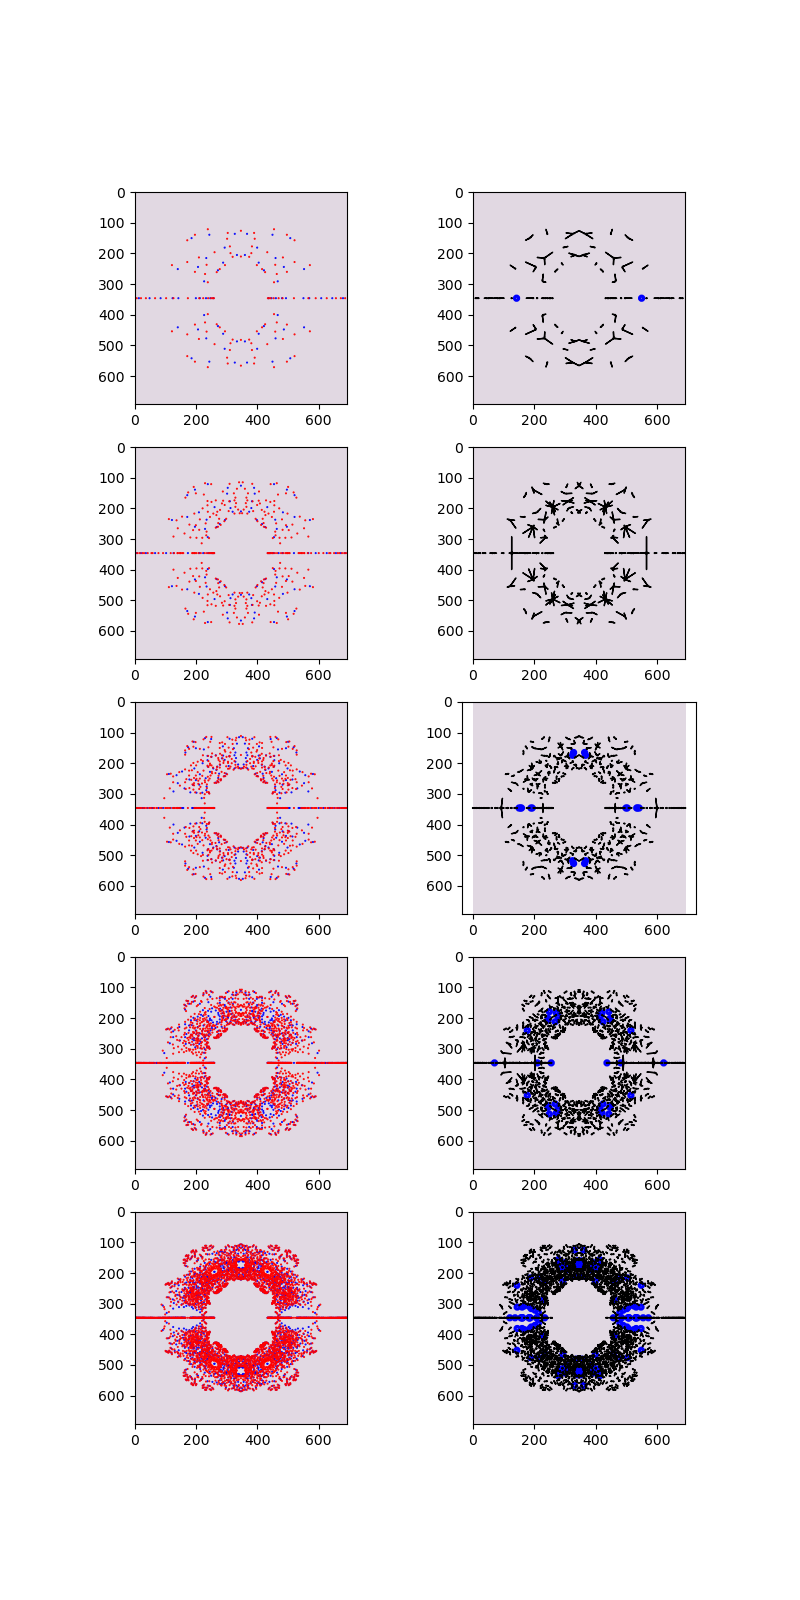

Missed roots (4): 2
Missed roots (5): 0
Missed roots (6): 18
Missed roots (7): 34
Missed roots (8): 130
Total Runtime: 38.552089499999965


In [62]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.perf_counter()

def nearestRoots(arr1,arr2):
    arr3 = np.nonzero(arr1)
    arr4 = np.nonzero(arr2)
    xs = []
    ys = []
    dxs = []
    dys = []
    for i in range(len(arr3[0])):
        dist = 1000
        tempDist = 1000
        tempX = []
        tempY = []
        tempDx = []
        tempDy = []
        for j in range(len(arr4[0])):
            tempDist = np.sqrt(pow((arr4[0][j]-arr3[0][i]),2) + (pow((arr4[1][j]-arr3[1][i]),2)))
            if tempDist < dist:
                tempX = arr3[0][i]
                tempY = arr3[1][i]
                tempDx = arr4[0][j]-arr3[0][i]
                tempDy = arr4[1][j]-arr3[1][i]
                dist = tempDist
            elif tempDist == dist:
                tempX = np.append(tempX, arr3[0][i])
                tempY = np.append(tempY, arr3[1][i])
                tempDx = np.append(tempDx, (arr4[0][j]-arr3[0][i]))
                tempDy = np.append(tempDy, (arr4[1][j]-arr3[1][i]))
        
        xs = np.append(xs,tempX)
        ys = np.append(ys,tempY)
        dxs = np.append(dxs,tempDx)
        dys = np.append(dys,tempDy)
    
    return xs, ys, dxs, dys

def arrowHeads(arr1,arr2):
    arr3 = np.nonzero(arr1)
    arr4 = np.nonzero(arr2)
    retArr = np.zeros_like(arr1)

    for i in range(len(arr3[0])):
        dist = 1000
        tempDist = 1000
        tempX = []
        tempY = []
        for j in range(len(arr4[0])):
            tempDist = np.sqrt(pow((arr4[0][j]-arr3[0][i]),2) + (pow((arr4[1][j]-arr3[1][i]),2)))
            if tempDist < dist:
                tempX = arr4[0][j]
                tempY = arr4[1][j]
                dist = tempDist
            elif tempDist == dist:
                tempX = np.append(tempX, arr4[0][j])
                tempY = np.append(tempY, arr4[1][j])
        if type(tempX) == np.ndarray:
            retArr[tempX[0]][tempY[0]] = 1
            retArr[tempX[1]][tempY[1]] = 1
        else:
            retArr[tempX][tempY] = 1
    
    return retArr
    

# Creating plot
fig, ax = plt.subplots(5,2,figsize=(8,16))

for i in range(5):
    dat0 = dataLst[i] + np.fliplr(dataLst[i])
    dat1 = dataLst[i+1] + np.fliplr(dataLst[i+1])
    arrX, arrY, arrDx, arrDy = nearestRoots(dat1,dat0)
    heads = arrowHeads(dat1,dat0)
    
    ax[i,0].imshow(dat0,cmap='twilight',interpolation=None)
    ax[i,1].imshow(dat1,cmap='twilight',interpolation=None)
    
    rootIndices = np.argwhere(np.swapaxes(dat0,0,1) >0)
    for inds in rootIndices:
        ax[i,0].add_patch(plt.Circle(inds, radius=2, edgecolor='b',lw=.6, fill=False))
    rootIndices1 = np.argwhere(np.swapaxes(dat1,0,1) >0)
    for inds1 in rootIndices1:
        ax[i,0].add_patch(plt.Circle(inds1, radius=2, edgecolor='r',lw=.6, fill=False))

    count4 = 0
    rootIndices4 = np.argwhere(np.swapaxes(np.where(dat0>0,1,0)-np.where(heads>0,1,0),0,1)!=0)
    for inds4 in rootIndices4:
        count4 += 1
        ax[i,1].add_patch(plt.Circle(inds4, radius=5, edgecolor='b',lw=3, fill=False))
    print("Missed roots ({}): {}".format(i+4, count4))

    for in0 in range(len(arrX)):
        ax[i,1].arrow(arrY[in0],arrX[in0],arrDy[in0],arrDx[in0], length_includes_head=True, head_width=3)

# ax0.streamplot(X, Y, U, V, density = 1)
# ax0.imshow(dat4,cmap='twilight',interpolation=None)
# ax1.imshow(dat5,cmap='twilight',interpolation=None)
# ax2.imshow(dat5,cmap='twilight',interpolation=None)
# ax3.imshow(dat6,cmap='twilight',interpolation=None)
# ax4.imshow(dat6,cmap='twilight',interpolation=None)
# ax5.imshow(dat7,cmap='twilight',interpolation=None)
 
# show plot
plt.show()

end = time.perf_counter()
print("Total Runtime:", (end-start))

<IPython.core.display.Javascript object>


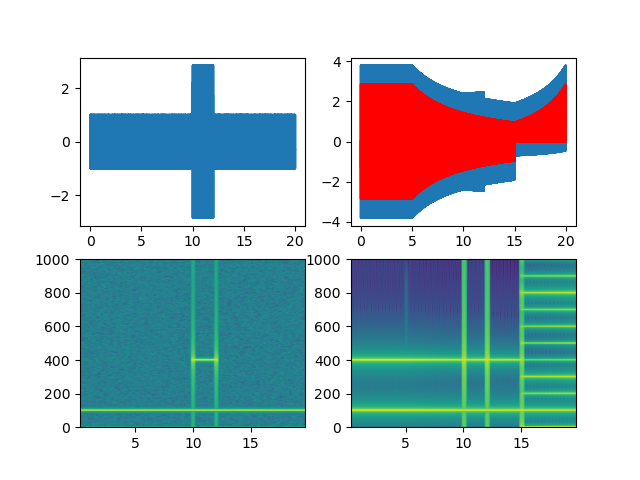

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.0005
numSteps = int(20.0 /dt)
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)
s3 = s1 - s2

for i in range(numSteps):
    if i <= 10000:
        pass
    elif i <= 30000:
        s3[i] = s3[i] *5.0 /t[i]
    else:
        s3[i] = abs(s3[i] *t[i] /(120 - 5.0*t[i]))

# create a transient "chirp"
s2[t <= 10] = s2[12 <= t] = 0

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))
nse2 = 0.0 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
x2 = s1 + s2 + s3 + nse2  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, axs = plt.subplots(nrows=2,ncols=2)
axs.flat[0].plot(t, x)
axs.flat[1].plot(t, x2)
axs.flat[1].plot(t, s3, c='r')
Pxx, freqs, bins, im = axs.flat[2].specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
Pxx, freqs, bins, im = axs.flat[3].specgram(x2, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()

In [63]:
import numpy as np

def reverseNearRoots(arr1,arr2):
    ### arr1 is the input matrix which represents the polynomial with GREATER degree.
    ## Each value in the 2x2 array is the number of roots which land on that pixel.
    ### arr2 is the input matrix which represents the polynomial with FEWER degree.
    ## Each value in the 2x2 array is the number of roots which land on that pixel.
    ## arr3 is an array of all nonzero values of arr1
    ## arr4 is an array of all nonzero values of arr2

    arr3 = np.nonzero(arr1)
    arr4 = np.nonzero(arr2)
    rankArr = np.zeros((np.count_nonzero(arr2),np.count_nonzero(arr1)))
    xStart = []
    yStart = []
    xEnd = []
    yEnd = []

    for i,(x1,y1) in enumerate(zip(arr4[0],arr4[1])):
        for j,(x2,y2) in enumerate(zip(arr3[0],arr3[1])):
            rankArr[i][j] = np.sqrt(pow((x2-x1),2) + (pow((y2-y1),2)))
    
    sortInds = np.argsort(rankArr,axis=1)
    ind = 0
    foundSet = set()
    tempSet = set()
    for m in range(np.count_nonzero(arr1)):
        for n in range(np.count_nonzero(arr2)):
            ind = sortInds[n][m]
            if ind not in foundSet:
                print(n)
                tempSet.add(ind)
                xStart.append(arr4[0][n])
                yStart.append(arr4[1][n])
                xEnd.append(arr3[0][ind])
                yEnd.append(arr3[1][ind])
        foundSet.update(tempSet)
    
    return np.array(xStart), np.array(yStart), np.array(xEnd), np.array(yEnd), (np.array(xEnd)-np.array(xStart)), (np.array(yEnd)-np.array(yStart))

arr = np.eye(5,k=2)
arr0 = np.identity(5)
arr1_ = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 0]])
arr2_ = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

# display(arr)
# display(arr0)

reverseNearRoots(arr0,arr)

(2, 3)
0
1
2
0
2


(array([0, 1, 2, 0, 2], dtype=int64),
 array([2, 3, 4, 2, 4], dtype=int64),
 array([1, 2, 3, 0, 4], dtype=int64),
 array([1, 2, 3, 0, 4], dtype=int64),
 array([1, 1, 1, 0, 2], dtype=int64),
 array([-1, -1, -1, -2,  0], dtype=int64))